[Women's E-Commerce Clothing Reviews](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)

* **Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.
* **Age:** Positive Integer variable of the reviewers age.
* **Title:** String variable for the title of the review.
* **Review** Text: String variable for the review body.
* **Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* **Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* **Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.
* **Division Name:** Categorical name of the product high level division.
* **Department Name:** Categorical name of the product department name.
* **Class Name:** Categorical name of the product class name.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
sns.set_style('whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Data Cleaning

In [2]:
wdf = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
wdf.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
wdf.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
wdf.shape

(23486, 10)

In [6]:
# Check for duplicate values
wdf.duplicated().sum()

21

In [7]:
# Dropping duplicates
wdf = wdf.drop_duplicates()
wdf.shape

(23465, 10)

In [8]:
# Check for null values
wdf.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
100*wdf.isnull().sum()/len(wdf.index)

Clothing ID                 0.000000
Age                         0.000000
Title                      16.147454
Review Text                 3.515875
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059663
Department Name             0.059663
Class Name                  0.059663
dtype: float64

In [10]:
# Dropping Null Values
wdf = wdf.dropna(subset=['Title','Review Text','Division Name','Department Name','Class Name'])
wdf.shape

(19662, 10)

In [11]:
# Creating columns for text lengths of 'Title' and 'Review Text'
wdf['Title Length'] = wdf['Title'].apply(len)
wdf['Review Length'] = wdf['Review Text'].apply(len)

# Visual Exploration

In [12]:
wdf.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,23,488
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,20,496


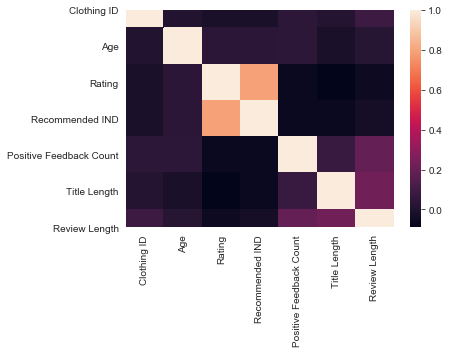

In [13]:
# Ratings seems to have a high correlation with recommended IND
sns.heatmap(wdf.corr())

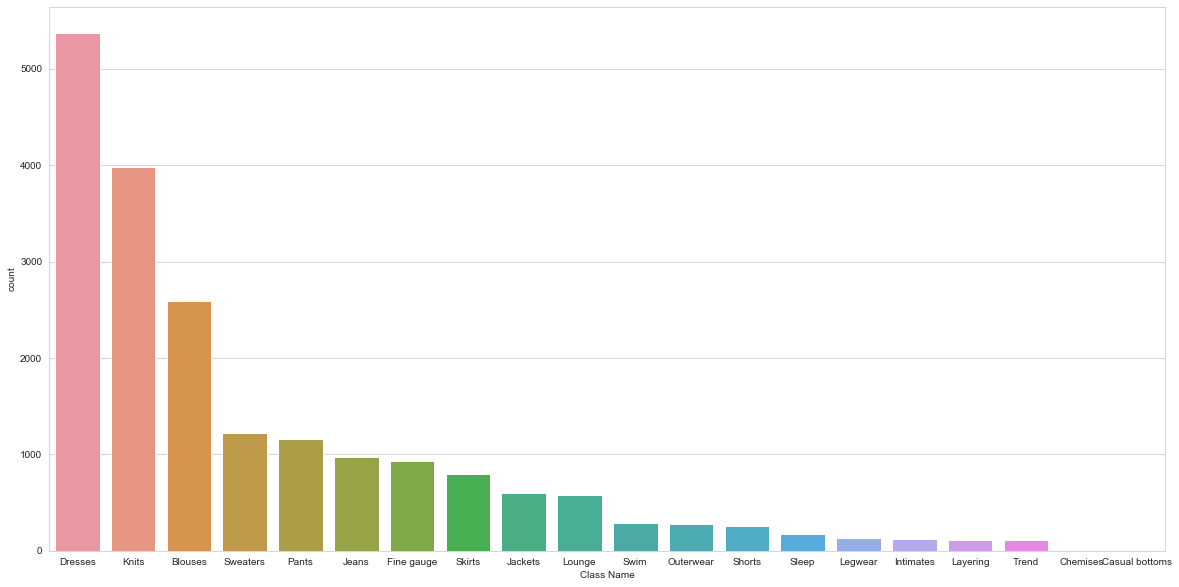

In [14]:
# Checking out distribution of 'Class Name'
plt.figure(figsize=(20,10))
sns.countplot(wdf['Class Name'],order=wdf['Class Name'].value_counts().index)

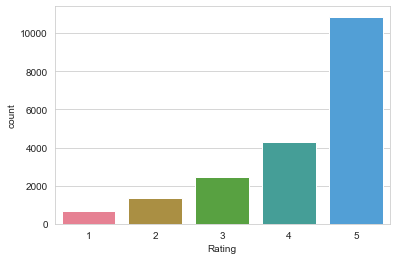

In [15]:
# Check Distribution of 'Rating'
sns.countplot(wdf['Rating'])

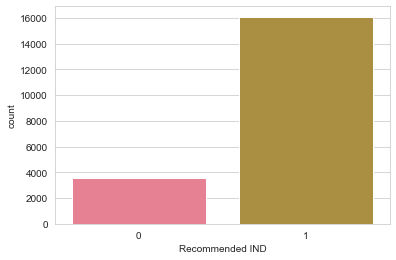

In [16]:
# Most people recommend the product(s) they buy
sns.countplot(wdf['Recommended IND'])

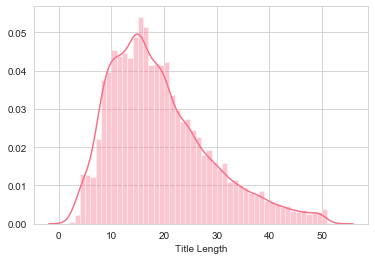

In [17]:
# 'Title Length' is fairly evenly distributed
sns.distplot(wdf['Title Length'])

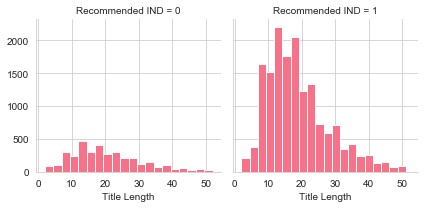

In [18]:
sns.FacetGrid(data=wdf,col='Recommended IND').map(plt.hist,'Title Length',bins=20)

In [19]:
# Fairly similar distribution in text length
# So, it doesn't seem text length for the title plays much of a role in recommendations

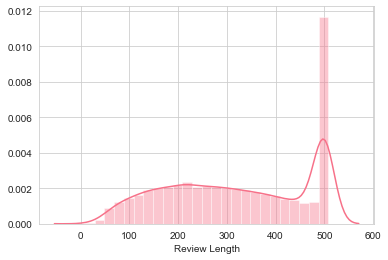

In [20]:
sns.distplot(wdf['Review Length'])

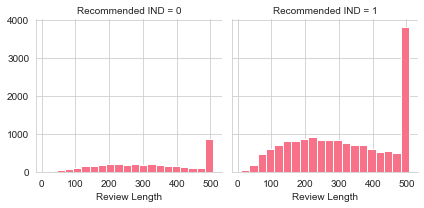

In [21]:
sns.FacetGrid(data=wdf,col='Recommended IND').map(plt.hist,'Review Length',bins=20)

In [22]:
# Fairly similar distribution in text length
# So, it doesn't seem text length for reviews play much of a role in recommendations

43.26080764927271


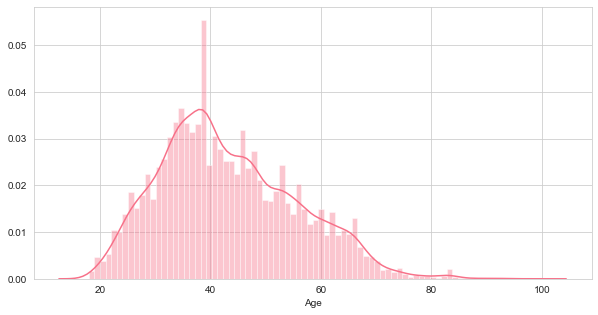

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(wdf['Age'],bins=80)
print(wdf['Age'].mean())

In [24]:
# The age distribution looks relatively normal around age 40
# Average Age is 43.26

## Text Preprocessing

In [25]:
X = wdf['Review Text']
y = wdf['Recommended IND']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [27]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
import string
from nltk.corpus import stopwords

In [30]:
def text_processing(mess):
    # removes punctuations in texts
    nopunc = [char for char in mess if char not in string.punctuation]
    # joins nopunc back together from a list to a single string
    nopunc = ''.join(nopunc)
    # removes words that are considered a stopword
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Pipeline

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [32]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Fit Model

In [33]:
pipeline.fit(X_train,y_train)

/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x1a1bc03d40>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

## Evaluations

In [34]:
prediction = pipeline.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[ 349  742]
 [ 164 4644]]
              precision    recall  f1-score   support

           0       0.68      0.32      0.44      1091
           1       0.86      0.97      0.91      4808

    accuracy                           0.85      5899
   macro avg       0.77      0.64      0.67      5899
weighted avg       0.83      0.85      0.82      5899



Overall, the model did fairly well with an f1-score of 82%. However, the recall rate and precision rate for 'not recommended' (0) could be better. I may be able to improve the model's accuracy by stemming the review texts... (run, ran, running)